# Classification of positive diabetes with TensorFlow 

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-09-04

Here, I present a simple and easy way to create a classification with TensorFlow. In this case the data based on file pima-indians-diabetes.csv. The targets are represented by the chance of have diabetes and the inputs are some medical parameters. Please refer to https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes for more information.

# The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split

# The data 

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


Verifying that data is completed

In [3]:
data[pd.isnull(data['BMI'])]

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group


learning about this data set

In [4]:
data.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [5]:
data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

# Clean the Data

In [6]:
data_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

data[data_norm] = data[data_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


## Feature Columns

In [7]:
#Number of times pregnant
num_preg = tf.feature_column.numeric_column('Number_pregnant')

#Plasma glucose concentration a 2 hours in an oral glucose tolerance test
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')

#Diastolic blood pressure (mm Hg)
dias_press = tf.feature_column.numeric_column('Blood_pressure')

#Triceps skin fold thickness (mm)
tricep = tf.feature_column.numeric_column('Triceps')

#2-Hour serum insulin (mu U/ml)
insulin = tf.feature_column.numeric_column('Insulin')

#Body mass index (weight in kg/(height in m)^2)
bmi = tf.feature_column.numeric_column('BMI')

#Diabetes pedigree function
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')

#Age will be converted to categorical
age = tf.feature_column.numeric_column('Age')

## Categorical features

In [8]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

## Converting continuous to categorical

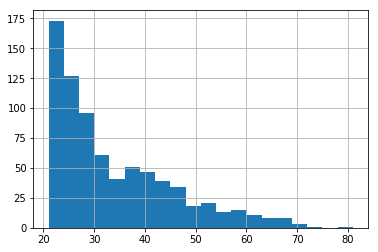

In [9]:
data['Age'].hist(bins=20)

In [10]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

## All together

In [11]:
Features = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

## Train-Test Split (Inputs and Targets)

In [12]:
Inputs_data = data.drop('Class', axis=1)
Targets_data = data['Class']

In [13]:
Inputs_train, Inputs_test, Targets_train, Targets_test = train_test_split(Inputs_data,Targets_data,test_size=0.33, random_state=101)

# Linear Classification

In [14]:
#Input function

Input_function = tf.estimator.inputs.pandas_input_fn(x=Inputs_train,y=Targets_train,batch_size=10,num_epochs=1000,shuffle=True)

In [15]:
#Creation of the model
Linear_model = tf.estimator.LinearClassifier(feature_columns=Features,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsxaooeo9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fef0a157320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
Linear_model.train(input_fn=Input_function, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpsxaooeo9/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 181.113
INFO:tensorflow:loss = 4.2556, step = 101 (0.552 sec)
INFO:tensorflow:global_step/sec: 304.133
INFO:tensorflow:loss = 6.867379, step = 201 (0.329 sec)
INFO:tensorflow:global_step/sec: 334.775
INFO:tensorflow:loss = 5.751403, step = 301 (0.299 sec)
INFO:tensorflow:global_step/sec: 326.928
INFO:tensorflow:loss = 7.5207634, step = 401 (0.306 sec)
INFO:tenso

In [18]:
#Evaluation of linear model
evaluation_linear = tf.estimator.inputs.pandas_input_fn(x=Inputs_test, y=Targets_test, batch_size=10,num_epochs=1,shuffle=False)

In [19]:
linear_results = Linear_model.evaluate(evaluation_linear)
linear_results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-09-10:53:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsxaooeo9/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-09-10:53:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.65748036, auc = 0.7872531, auc_precision_recall = 0.6283504, average_loss = 0.5328342, global_step = 1000, label/mean = 0.34251967, loss = 5.20538, precision = 0.5925926, prediction/mean = 0.3759439, recall = 0.55172414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpsxaooeo9/model.ckpt-1000


{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7872531,
 'auc_precision_recall': 0.6283504,
 'average_loss': 0.5328342,
 'label/mean': 0.34251967,
 'loss': 5.20538,
 'precision': 0.5925926,
 'prediction/mean': 0.3759439,
 'recall': 0.55172414,
 'global_step': 1000}

In [20]:
#New data prediction

linear_prediction = tf.estimator.inputs.pandas_input_fn(x=Inputs_test, batch_size=10,num_epochs=1,shuffle=False)
prediction_linear = Linear_model.predict(linear_prediction)
list(prediction_linear)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsxaooeo9/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.18301022], dtype=float32),
  'logistic': array([0.54562527], dtype=float32),
  'probabilities': array([0.4543747 , 0.54562527], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.6004585], dtype=float32),
  'logistic': array([0.6457612], dtype=float32),
  'probabilities': array([0.3542388, 0.6457612], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.45918673], dtype=float32),
  'logistic': array([0.3871788], dtype=float32),
  'probabilities': array([0.6128212 , 0.38717878], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6810621], dtype=float32),
  'logistic': array([0.33602428], dtype=float32),
  'probabilities': array([0.6639757 , 0.33602428], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7383103], dtype=float32),
  'logistic': ar

# DNN Classifier

In [21]:
#Befrore perform this clasification, it is necessary to change the Group features
DNN_group = tf.feature_column.embedding_column(assigned_group, dimension=4)

#New features:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,DNN_group, age_buckets]

DNN_input_function = tf.estimator.inputs.pandas_input_fn(x=Inputs_train,y=Targets_train,batch_size=10,num_epochs=1000,shuffle=True)

DNN_model = tf.estimator.DNNClassifier(hidden_units=[15,15,15],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpeceoysw1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fef0936fb38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
DNN_model.train(input_fn=DNN_input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpeceoysw1/model.ckpt.
INFO:tensorflow:loss = 7.4007254, step = 1
INFO:tensorflow:global_step/sec: 156.082
INFO:tensorflow:loss = 4.1643686, step = 101 (0.644 sec)
INFO:tensorflow:global_step/sec: 280.891
INFO:tensorflow:loss = 5.838494, step = 201 (0.354 sec)
INFO:tensorflow:global_step/sec: 197.37
INFO:tensorflow:loss = 4.6323786, step = 301 (0.508 sec)
INFO:tensorflow:global_step/sec: 245.592
INFO:tensorflow:loss = 3.8837159, step = 401 (0.407 sec)
INFO:tensorflow:global_step/sec: 218.288
INFO:tensorflow:loss = 7.988899, step = 501 (0.459 sec)
INFO:tensorflow:global_step/sec: 211.715
INFO:tensorflow:loss = 5.210328, step = 601 (0.471 sec)
INFO:tensorflow:global_step/sec: 257.014
INFO:tensorflow:loss

In [23]:
#Evaluation of DNN model
evaluation_DNN = tf.estimator.inputs.pandas_input_fn(x=Inputs_test, y=Targets_test, batch_size=10,num_epochs=1,shuffle=False)

In [24]:
DNN_model.evaluate(evaluation_DNN)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-09-11:50:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeceoysw1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-09-11:50:30
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7480315, accuracy_baseline = 0.65748036, auc = 0.8177438, auc_precision_recall = 0.68011683, average_loss = 0.5007716, global_step = 1000, label/mean = 0.34251967, loss = 4.8921533, precision = 0.65753424, prediction/mean = 0.31981277, recall = 0.55172414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpeceoysw1/model.ckpt-1000


{'accuracy': 0.7480315,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8177438,
 'auc_precision_recall': 0.68011683,
 'average_loss': 0.5007716,
 'label/mean': 0.34251967,
 'loss': 4.8921533,
 'precision': 0.65753424,
 'prediction/mean': 0.31981277,
 'recall': 0.55172414,
 'global_step': 1000}

In [25]:
#We have improved the accuracy from 0.71 to 0.74